# Goniomètre - Exploitation des données expérimentales

Dans cette activité, vous devrez utiliser des données expérimentales obtenues lors de manipulations identiques à celles réalisées en TP pour:
* Etalonner un goniomètre à prisme en déterminant les paramètres A et B de la loi de Cauchy
$$
n(\lambda) = A + \frac{B}{\lambda^2}
$$
* Utiliser ces courbes d'étalonnage pour obtenir la longueur d'onde moyenne du doublet du sodium (qui ne pouvait être résolu par le prisme).
* Obtenir, de la mesure de longueur d'onde moyenne précédente ET de la mesure de déviation par une goniomètre à réseau le nombre de traits/mm N du réseau
* Utiliser la longueur d'onde moyenne du doublet et les mesures séparées des angles de déviation pour chaque longueur d'onde du doublet pour obtenir la largeur $\Delta \lambda$ du doublet du sodium au réseau.

## Données expérimentales
Les données expérimentales sont entrées dans la cellule de code suivante.  
_La partie utilisant la bibliothèque pandas n'est pas à connaître. Elle sert juste ici pour mettre en forme l'affichage des résultats._

__Notes sur les incertitudes:__  
* On considèrera l'incertitude sur toutes les longueurs d'onde _référencées_ comme négligeables.
* les `delta` données ne correspondent pas à l'incertitude des mesurandes directes mais __à la demi-largeur de la distribution uniforme estimée lors de la mesure.__
    * Conséquence pour une simulation de Monte-Carlo : vous pouvez utiliser directement ces demi-largeur.
    * Conséquence pour une propagation des variances : l'incertitude-type associée est alors $\frac{demi-largeur}{\sqrt{3}}$
* On a considéré que l'incertitude à la lecture des angles était la seule source d'incertitude.

In [18]:
# Bibliothèques scientifiques
import numpy as np
import matplotlib.pyplot as plt

# Goniomètre - Faisceau incident
theta_0 = 2.6011  # Angle repéré (rad) pour la visée du faisceau incident
deltatheta_0 = 6e-4  # Demie-largeur (rad) associée à la mesure de theta0

# Goniomètre - Mesure de l'angle A
thetas_A = np.array([0.4608, 2.554])  # Angles aux normales des faces du prisme
deltathetas_A = np.array([6e-4]*2)  # Demie-largeur sur les incertitudes des mesures précédentes.


# Goniomètre à prisme - Cas du mercure
lambda_Hg = np.array([404.7, 407.8, 435.8, 491.6, 546.1, 578])  # Longueurs d'onde (nm) du mercure
theta_Hg = np.array([3.3385, 3.3379, 3.3333, 3.3263, 3.3205, 3.3181])  # Angles sous lequel sont observés les rayons déviés (rad) mesurés
deltatheta_Hg = np.array([6e-4]*6)  # Demie-largeur (rad) associée à l'incertitude les mesures des angles précédents

# Goniomètre à prisme - Cas du sodium
theta_Na = 3.3176  # Angle sous lequel était observé le doublet (= une seule raie ici)
deltatheta_Na = 6e-4  # Demie-largeur (rad) associée à l'incertitude sur la mesure précédente

# Goniomètre à réseau - Cas du sodium
lambda_Na_moy = 589.3  # Longueur d'onde moyenne (nm) du doublet du sodium
p = -2  # Ordre d'interférence observé
theta_Na_r = np.array([1.8050, 1.8064]) # Angle d'observation des deux raies du doublet pour l'ordre précédent.
deltatheta_Na_r = np.array([6e-4]*2)  # Demie-largeur (rad) associée aux incertitudes sur les mesures précédentes.

In [19]:
# Bibliothèque pour l'affichage des données
# Le code de cette ccellule n'est pas à connaître
import pandas as pd
print("----MESURE DE L'ANGLE DE REFERENCE----")
df0 = pd.DataFrame({
    r'$\theta_0$': [theta_0],
    r'$\Delta \theta_0$': [deltatheta_0]
})

display(df0)

print("----MESURES DES ANGLES POUR LA MESURE DE A----")
dfA = pd.DataFrame({
    r'$\theta_{A}$': thetas_A,
    r'$\Delta \theta_A$': deltathetas_A
})

display(dfA)

print("----MESURES DES ANGLES POUR LE MERCURE----")
dfHg = pd.DataFrame({
    r'$\lambda$': lambda_Hg,
    r'$\theta_{Hg}$': theta_Hg,
    r'$\Delta \theta_{Hg}$': deltatheta_Hg
})

display(dfHg)

print("----MESURE DE L'ANGLE POUR LE SODIUM----")
dfNa = pd.DataFrame({
    r'$\theta_{Na}$': [theta_Na],
    r'$\Delta \theta_{Na}$': [deltatheta_Na]
})

display(dfNa)

print("----MESURES (SODIUM) AU RESEAU---")
print("lambda_moyen = {} nm".format(589.3))
dfNa_reseau = pd.DataFrame({
    r'$\theta_Hg$': theta_Na_r,
    r'$\Delta \theta_Hg$': deltatheta_Na_r
})

display(dfNa_reseau)

----MESURE DE L'ANGLE DE REFERENCE----


,$\theta_0$,$\Delta \theta_0$
0,2.6011,0.0006


----MESURES DES ANGLES POUR LA MESURE DE A----


,$\theta_{A}$,$\Delta \theta_A$
0,0.4608,0.0006
1,2.5540,0.0006


----MESURES DES ANGLES POUR LE MERCURE----


,$\lambda$,$\theta_{Hg}$,$\Delta \theta_{Hg}$
0,404.7,3.3385,0.0006
1,407.8,3.3379,0.0006
2,435.8,3.3333,0.0006
3,491.6,3.3263,0.0006
4,546.1,3.3205,0.0006
5,578.0,3.3181,0.0006


----MESURE DE L'ANGLE POUR LE SODIUM----


,$\theta_{Na}$,$\Delta \theta_{Na}$
0,3.3176,0.0006


----MESURES (SODIUM) AU RESEAU---
lambda_moyen = 589.3 nm


,$\theta_Hg$,$\Delta \theta_Hg$
0,1.8050,0.0006
1,1.8064,0.0006


### Rappels
Pour rappel:
* les angles de déviation se rapporte à l'angle de référence $\theta_0$
* l'angle $A$ s'obtient par $A = \pi - (\theta_{A2} - \theta_{A1})$
* la relation entre l'indice réfraction et l'angle déviation minimal est $n(\lambda) = \frac{\sin\left(\frac{A + D_m}{2}\right)}{\sin\left(\frac{A}{2}\right)}$

## Goniomètre à prisme
### Etalonnage au mercure

Utiliser les données précédentes (utiliser une méthode de Monte-Carlo pour les incertitudes) pour:
1. Déterminer l'angle au sommet A du prisme ainsi que son incertitude.
2. Déterminer les indices de réfraction pour chaque longueur d'onde du mercure ainsi que les incertitudes sur chaque indice.
3. Déterminer les coefficients A et B de la loi de Cauchy ainsi que leurs incertitudes par une méthode de régression linéaire.
4. Tracer sur un même graphique les points de mesures $n(??)$ et la droite d'étalonnage.
5. Vérifier visuellement la cohérence. S'il y a des doutes sur des points, pensez à calculer l'écart normalisé.

A = 1.04839 +/- 0.00049 rad


,$\lambda$,n,u(n)
0,404.7,1.556173,0.000126
1,407.8,1.555797,0.000125
2,435.8,1.552909,0.000125
3,491.6,1.548500,0.000124
4,546.1,1.544833,0.000124
5,578.0,1.543311,0.000124


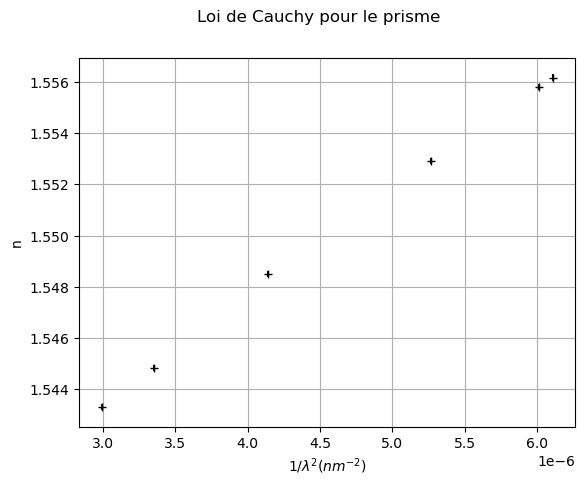

Dans la relation n(lambda) = A + B / lambda^2, la régression linéaire donne:
A = 1.53113 +/- 0.00013 
B = 4117 +/- 11 nm^2


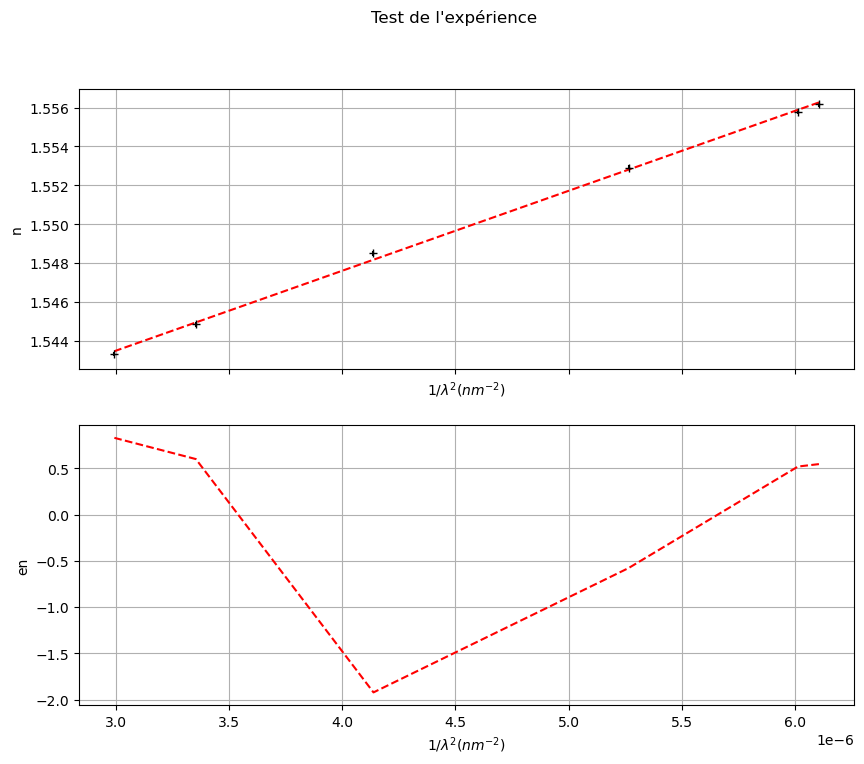

In [20]:
import numpy.random as rd
Nsim = 100000  # Nombre de simulations pour Monte-Carlo
# ----Préparation pour Monte-Carlo ----
# Pour préparer Monte-Carlo, on simulation de suite tous les mesurandes directes
## Pour l'angle d'incidence
theta_0_sim = theta_0 + rd.uniform(-deltatheta_0, deltatheta_0, Nsim)
## Pour l'angle A
thetas_A_sim = thetas_A + rd.uniform(-deltathetas_A, deltathetas_A, (Nsim, 2))
## Prisme - Mercure
nlambda = len(theta_Hg)
theta_Hg_sim = theta_Hg + rd.uniform(-deltatheta_Hg, deltatheta_Hg, (Nsim, nlambda))
## Prisme - Sodium
theta_Na_sim = theta_Na + rd.uniform(-deltatheta_Na, deltatheta_Na, Nsim)
## Reseau - Sodium
theta_Nar_sim = theta_Na_r + rd.uniform(-deltatheta_Na_r, deltatheta_Na_r, (Nsim, 2))


# ---- Angle au sommet ----
A_m = np.pi - (thetas_A[1]-thetas_A[0])
A_sim = thetas_A_sim[:,1] - thetas_A_sim[:,0]  # Même formule avec chaque colonne de valeurs simulées
A_u = np.std(A_sim, ddof=1)

print("A = {:.5f} +/- {:.5f} rad".format(A_m, A_u))

# ---- Indices de réfraction ----
Ds_m = theta_Hg - theta_0
ns_m = np.sin((Ds_m + A_m) / 2) / np.sin(A_m / 2)
Ds_sim = theta_Hg_sim - np.transpose([theta_0_sim]*6)
ns_sim = np.sin((Ds_sim + np.transpose([A_sim]*6)) / 2) / np.transpose([np.sin(A_sim / 2)]*6)
ns_u = np.std(ns_sim, ddof=1, axis=0)

## Juste un joli affichage - pas à connaître
display(pd.DataFrame({
    r'$\lambda$': lambda_Hg,
    'n': ns_m,
    'u(n)': ns_u
}))

## On teste si l'adéquation à la loi de Cauchy peut visuellement être acceptable en traçant n(1/lambda^2)
inv_lamb2 = lambda_Hg**(-2)

f, ax = plt.subplots()
f.suptitle("Loi de Cauchy pour le prisme")
ax.set_xlabel(r'$1/\lambda^2(nm^{-2})$')
ax.set_ylabel('n')
ax.errorbar(inv_lamb2, ns_m, yerr=ns_u, marker="+", linestyle='', color='black')
ax.grid()
plt.show()

# ---- Loi de Cauchy ----
## On va réaliser une régression linéaire puis la répéter Nsim fois pour Monte-Carlo
params_m = np.polyfit(inv_lamb2, ns_m, 1)

params_sim = np.polyfit(inv_lamb2, ns_sim.transpose(), 1)  # Pas d'incertitude sur X, polyfit gère tout seule les multiples simulations !
params_u = np.std(params_sim, ddof=1, axis=1)

print("Dans la relation n(lambda) = A + B / lambda^2, la régression linéaire donne:")
print("A = {:.5f} +/- {:.5f} ".format(params_m[1], params_u[1]))
print("B = {:.0f} +/- {:.0f} nm^2".format(params_m[0], params_u[0]))

ns_fit = params_m[0] * inv_lamb2 + params_m[1]
ns_fit_sim = np.array([x * params_sim[0] + params_sim[1] for x in inv_lamb2])  # Pas possible ici d'utiliser la vectorialisation
ns_fit_u = np.std(ns_fit_sim, ddof=1, axis=1)

f, ax = plt.subplots(2, 1, figsize=(10,8), sharex='col')
f.suptitle("Test de l'expérience")
ax[0].set_xlabel(r'$1/\lambda^2(nm^{-2})$')
ax[0].set_ylabel('n')
ax[0].errorbar(inv_lamb2, ns_m, yerr=ns_u, marker="+", linestyle='', color='black')
ax[0].plot(inv_lamb2, ns_fit, linestyle='--', color='red')
ax[0].grid()

en = (ns_fit - ns_m) / np.sqrt(ns_u**2 + ns_fit_u**2)

ax[1].set_xlabel(r'$1/\lambda^2(nm^{-2})$')
ax[1].set_ylabel('en')
ax[1].plot(inv_lamb2, en, linestyle='--', color='red')
ax[1].grid()

_La droite d'ajustement passant presque par toutes les barres d'incertitude. On a calculé les écarts normalisées qui sont tous entre -2 et 2, on peut valider l'adéquation entre le modèle et l'expérience réalisée._

#### BONUS : Fuseau pour l'étalonnage.
La droite d'ajustement précédente va servir d'étallonnage pour la mesure de la longueur d'onde du sodium (ou d'autrs !). Il peut-être utile alors de représenter _sur le graphique_ la largeur de l'incertitude qu'on aurait pour chaque valeur de $\lambda$.

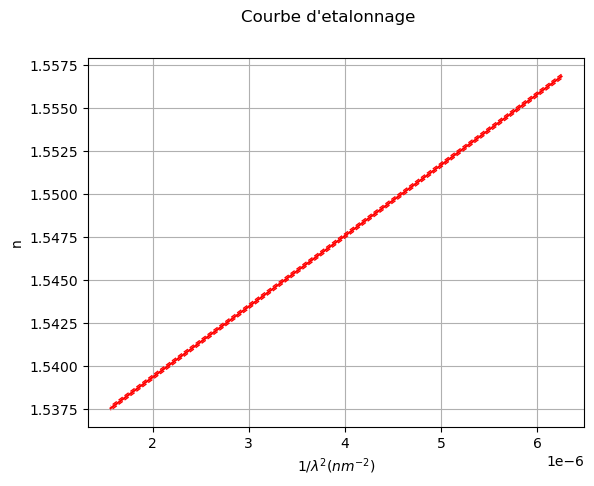

In [21]:
lambdas = np.linspace(400, 800, 1000)  # 1000 points dans le visible
inv_lamb2s = lambdas ** (-2)
ns_fit_m = params_m[0] * inv_lamb2s + params_m[1]
ns_fit_sim = np.array([x * params_sim[0] + params_sim[1] for x in inv_lamb2s])  # Pas possible ici d'utiliser la vectorialisation
ns_fit_u = np.std(ns_fit_sim, ddof=1, axis=1)

f, ax = plt.subplots()
f.suptitle("Courbe d'etalonnage")
ax.set_xlabel(r'$1/\lambda^2(nm^{-2})$')
ax.set_ylabel('n')
ax.plot(inv_lamb2s, ns_fit_m, linestyle='-', color='red')
ax.plot(inv_lamb2s, ns_fit_m - ns_fit_u, linestyle='--', color='red', linewidth=1)
ax.plot(inv_lamb2s, ns_fit_m + ns_fit_u, linestyle='--', color='red', linewidth=1)
ax.grid()
plt.show()



### Mesure de la longueur d'onde du sodium
Utiliser les données précédentes (utiliser une méthode de Monte-Carlo pour les incertitudes) pour:
1. Déterminer l'indice de réfraction du prisme pour le doublet du sodium
2. La longueur d'onde moyenne du doublet ainsi que son incertitude.
3. La comparer à la valeur tabulée (valeur moyenne donnée précédemment) et commenter la qualité de la mesure.

In [22]:
# Détermination de D et n pour le doublet
D_Na_m = theta_Na - theta_0
n_Na_m = np.sin((D_Na_m + A_m)/2) / np.sin(A_m/2)

D_Na_sim = theta_Na - theta_0
n_Na_sim = np.sin((D_Na_sim + A_sim)/2) / np.sin(A_sim/2)
n_Na_u = np.std(n_Na_sim, ddof=1)

print("n_Na = {:.6f} +/- {:.6f}".format(n_Na_m, n_Na_u))

# Calcul de lambda par inversion de la relation ajustée entre n et 1/lambda^2
lambda_Na_m = ((n_Na_m - params_m[1]) / params_m[0])**(-1/2)
lambda_Na_sim = ((n_Na_sim - params_sim[1]) / params_sim[0])**(-1/2)
lambda_Na_u = np.std(lambda_Na_sim, ddof=1)

print("lambda_Na = {:.1f} +/- {:.1f}".format(lambda_Na_m, lambda_Na_u))
en = (lambda_Na_m - lambda_Na_moy) / lambda_Na_u
print("EN =  {:.3f}".format(en))

n_Na = 1.542994 +/- 0.000114
lambda_Na = 589.1 +/- 7.0
EN =  -0.026


## Goniomètre à réseau
Utiliser les données précédentes (utiliser la propagation des variances pour les incertitudes) pour:
1. Déterminer, à partir de la longueur d'onde moyenne, le nombre de traits par millimètre du réseau. Le constructeur donne 600tr/mm (incertitude inconnue), commenter la cohérence avec la valeur mesurée.
2. Déterminer avec le N mesuré, l'écart en longueur d'onde $\Delta \lambda$ du doublet et le comparer à la valeur tabulée $\Delta \lambda = 0.6 nm$.

In [33]:
# Calcul du nombre de traits
D_Na_r = np.mean(theta_Na_r) - theta_0  # On prend la moyenne des positions des deux raies
N_m = np.sin(D_Na_r)/(lambda_Na_moy * p)

D_Na_r_sim = np.mean(theta_Nar_sim, axis=1) - theta_0_sim
N_sim = np.sin(D_Na_r_sim)/(lambda_Na_moy * p)
N_u = np.std(N_sim, ddof=1)

print("N = {:.2f} +/- {:.2f} traits/mm".format(N_m * 1e6, N_u * 1e6))  # On passe en traits/mm

Delta_lambda_m = (np.sin(theta_Na_r[0] - theta_0) - np.sin(theta_Na_r[1] - theta_0)) / (p * N_m)
Delta_lambda_sim = (np.sin(theta_Nar_sim[:,0] - theta_0_sim) - np.sin(theta_Nar_sim[:,1] - theta_0_sim)) / (p * N_sim)
Delta_lambda_u = np.std(Delta_lambda_sim, ddof=1)
print("Delta lambda = {:.2f} +/- {:.2f} nm".format(Delta_lambda_m, Delta_lambda_u))  # N_m étant en traits/nm, la longueur est exprimée en nm

Delta_lambda_ref = 0.6
en = (Delta_lambda_m - Delta_lambda_ref) / Delta_lambda_u
print("EN = {:.2f}".format(en))

N = 605.93 +/- 0.25 traits/mm
Delta lambda = 0.81 +/- 0.28 nm
EN = 0.74


On peut considérer que l'expérience a été bien menée car son résultat est cohérent avec la valeur tabulée.